# Transform Eikon Dataset to CSV

Market Value  - MARKET VALUE

Daily Trading Value  
Daily Trading Value - TURNOVER BY VALUE

We process data from 2014-2019. Each file contain data for one year.

Example:  BA

1261 trading days  
1566 calendar days

Create universe for trading system.

1. on particular date to set universe. In this study, chose 2019-01-01.
2. rank stock by market capitalization. Get list of 300 stocks.  
3. compute moving average of daily turnover value over 100 days. Rank top 300 stocks.  
4. Construct trading universe by condition that it is among the top 300 market capitalization and the top 200 daily turnover value.

In [11]:
import os, sys
import xlrd
import pandas as pd
from datetime import datetime
import talib
from talib.abstract import *

os.chdir("/home/jovyan/eikon-data")
os.listdir()

['SET_MV_2014-2020.xlsm',
 'SET_Metadata_2014-2020.xlsm',
 'SET_DY_2014-2020.xlsm',
 'Univese_Data2020.xlsx',
 'SET_Price_2014-2020.xlsm',
 'lookup-stock.csv',
 'SET_DIPE_2014-2020.xlsm',
 '.ipynb_checkpoints',
 'SET_VA_2014-2020.xlsm',
 'SET_PE_2014-2020.xlsm',
 'SET_VO_2014-2020.xlsm']

In [12]:
fname = 'SET_VA_2014-2020.xlsm'
wb = xlrd.open_workbook(fname)

In [13]:
wb.sheet_names()

['REQUEST_TABLE',
 'Data2020',
 'Data2019',
 'Data2018',
 'Data2017',
 'Data2016',
 'Data2015',
 'Data2014']

In [14]:
sheet = wb.sheets()[7]

# sheet.row(1)
# sheet.col(2)

sheet

In [15]:
sheet.nrows

265

# Time Series for Each Stock

Process daily turnover data of each stock.

Stack worksheet together.

In [16]:
series = {}

for i in range(2,8): # Note the sheet index 2014-2019
    s = wb.sheets()[i]

    # Date index
    s1 = pd.Series(s.col(0)[4:]) # observation starts at row 4
    s1 = s1.apply(lambda x: datetime(*xlrd.xldate_as_tuple(x.value, wb.datemode)))
    
    for j in range(1, s.ncols):
        c = s.col(j)
        print("{}".format(c[3].value))
        name = c[3].value
        # df = pd.DataFrame()
        if not "#ERROR" in name:
            # Convert spreadsheet market cap value to python
            s2 = pd.Series(c[4:]) # observation starts at row 4
            s2 = s2.apply(lambda x: x.value)
            df = pd.concat([s1, s2], axis=1)

            if not name in series:
                series[name] = []
            series[name].append(df)


SEVEN UTILITIES AND POWER ORS - TURNOVER BY VALUE
AREEYA PROPERTY - TURNOVER BY VALUE
ASIA AVIATION - TURNOVER BY VALUE
AMATA B GRIMM PWPL.IFCF. - TURNOVER BY VALUE
ADVANCED CONNECTION CORPORATION - TURNOVER BY VALUE
ABSOLUTE CLEAN ENERGY - TURNOVER BY VALUE
AUTOCORP HOLDING - TURNOVER BY VALUE
ADVANCED INFO SER. - TURNOVER BY VALUE
AEC SECURITIES - TURNOVER BY VALUE
AE.THANA SINSAP (THAI.) - TURNOVER BY VALUE
ASIA FIBER - TURNOVER BY VALUE
AAPICO HITECH - TURNOVER BY VALUE
AIKCHOL HOSPITAL - TURNOVER BY VALUE
ASIAN INSULATORS - TURNOVER BY VALUE
AIM COML.GW.FH.&. LH. REIT UNT. - TURNOVER BY VALUE
AIM INDL.GW.FH.&. LH. REIT - TURNOVER BY VALUE
ADVANCED INFO.TECH. - TURNOVER BY VALUE
AJ PLAST - TURNOVER BY VALUE
AJ ADVANCE TECHNOLOGY ORS - TURNOVER BY VALUE
EKARAT ENGINEERING - TURNOVER BY VALUE
ALLA - TURNOVER BY VALUE
ALT TELECOM - TURNOVER BY VALUE
ALUCON - TURNOVER BY VALUE
AMANAH LEASING - TURNOVER BY VALUE
AMARIN PRINTING & PBL. - TURNOVER BY VALUE
AMATA - TURNOVER BY VALUE
AMATA 

KGI SECURITIES - TURNOVER BY VALUE
KULTHORN KIRBY - TURNOVER BY VALUE
KIATNAKIN BANK - TURNOVER BY VALUE
KPN PROPERTY - TURNOVER BY VALUE
KHON KAEN SUGAR - TURNOVER BY VALUE
KRUNG THAI BANK - TURNOVER BY VALUE
KRUNGTHAI CARD - TURNOVER BY VALUE
KASET THAI INTERNATIONAL SUG. - TURNOVER BY VALUE
KRUNGDHEP SOPHON - TURNOVER BY VALUE
KING WAI GROUP - TURNOVER BY VALUE
KANG YONG ELECTRIC - TURNOVER BY VALUE
LIGHTING & EQUIPMENT - TURNOVER BY VALUE
LALIN PROPERTY - TURNOVER BY VALUE
LANNA RESOURCES - TURNOVER BY VALUE
LEE FEED MILL - TURNOVER BY VALUE
LAND AND HOUSES - TURNOVER BY VALUE
LH FINANCIAL GP. - TURNOVER BY VALUE
LH HTL.LH.REIT.TST. UTS. - TURNOVER BY VALUE
LOHAKIT METAL - TURNOVER BY VALUE
LD.&.HSES.FH.AND LH.PR. - TURNOVER BY VALUE
LH SHOPPING CENTERS LEASEHOLD REIT - TURNOVER BY VALUE
LOXLEY - TURNOVER BY VALUE
LADPRAO GENERAL HOSPITAL - TURNOVER BY VALUE
LPN DEVELOPMENT - TURNOVER BY VALUE
LAGUNA RESORTS & HOTELS - TURNOVER BY VALUE
LAM SOON - TURNOVER BY VALUE
LUXURY REAL ESTA

THAI STANLEY ELECTRIC - TURNOVER BY VALUE
STARK CORPORATION - TURNOVER BY VALUE
SINO-THAI ENGR.CON. - TURNOVER BY VALUE
#ERROR
STP & I - TURNOVER BY VALUE
SAHA-UNION - TURNOVER BY VALUE
SUPER ENERGY CORPORATION - TURNOVER BY VALUE
SUPER ENERGY POWER PLANT INFRASTRUCTURE - TURNOVER BY VALUE
SUSCO - TURNOVER BY VALUE
GOLDEN LIME - TURNOVER BY VALUE
SAMITIVEJ - TURNOVER BY VALUE
SVI - TURNOVER BY VALUE
SVOA - TURNOVER BY VALUE
SYMPHONY COMMUNICATION - TURNOVER BY VALUE
SYNNEX (THAILAND) - TURNOVER BY VALUE
SYNTEC CONSTRUCTION - TURNOVER BY VALUE
THAI AGRO ENERGY - TURNOVER BY VALUE
TIPCO ASPHALT - TURNOVER BY VALUE
TBSP - TURNOVER BY VALUE
TROPICAL CANNING - TURNOVER BY VALUE
THANACHART CAPITAL - TURNOVER BY VALUE
THAI CAPITAL - TURNOVER BY VALUE
THAI CENTRAL CHM. - TURNOVER BY VALUE
TCJ ASIA - TURNOVER BY VALUE
TCM CORPORATION ORS - TURNOVER BY VALUE
THAI COATING INDL. - TURNOVER BY VALUE
TEAM PRECISION - TURNOVER BY VALUE
TEAM CNSL.ENGR.&. MAN. - TURNOVER BY VALUE
THAILAND FUTURE - TURN

CPN COML.GW.LH.PR. - TURNOVER BY VALUE
CPN RETAIL GROWTH LEASEHOLD REIT - TURNOVER BY VALUE
CPT DRIVES AND POWER - TURNOVER BY VALUE
C P TOWER GROWTH LEASEHOLD PROPERTY - TURNOVER BY VALUE
#ERROR
CHU KAI - TURNOVER BY VALUE
#ERROR
CROWN SEAL - TURNOVER BY VALUE
CSP STEEL CENTER - TURNOVER BY VALUE
CITY SPORTS & RECREATION - TURNOVER BY VALUE
COMMUNICATION & SYSTEM SOLUTION - TURNOVER BY VALUE
CENTARA H&R.LH.PR. - TURNOVER BY VALUE
CHAROONG THAI WIRE CAB. - TURNOVER BY VALUE
CHAI WATANA TANNERY - TURNOVER BY VALUE
DYNASTY CERAMIC - TURNOVER BY VALUE
DCON PRODUCTS - TURNOVER BY VALUE
DO DAY DREAM - TURNOVER BY VALUE
DELTA ELECTRONICS - TURNOVER BY VALUE
DEMCO - TURNOVER BY VALUE
DIGITAL TELECOM.IFCF. - TURNOVER BY VALUE
#ERROR
DUSIT THANI FH.&. LH. REIT - TURNOVER BY VALUE
DIAMOND BLDG.PRODUCTS - TURNOVER BY VALUE
TOTAL ACCESS COMMS. - TURNOVER BY VALUE
DUSIT THANI - TURNOVER BY VALUE
DTC INDUSTRIES - TURNOVER BY VALUE
ENERGY ABSOLUTE - TURNOVER BY VALUE
EASON & - TURNOVER BY VALUE
EASTE

RPCG - TURNOVER BY VALUE
RATCHAPHRUEK HOSPITAL - TURNOVER BY VALUE
RS - TURNOVER BY VALUE
RICH SPORT - TURNOVER BY VALUE
S & J INTL.ENTERPRISES - TURNOVER BY VALUE
S11 GROUP - TURNOVER BY VALUE
SINGHA ESTATE - TURNOVER BY VALUE
SABINA - TURNOVER BY VALUE
SAMCHAI STEEL INDS. - TURNOVER BY VALUE
SAMART - TURNOVER BY VALUE
SAMMAKORN - TURNOVER BY VALUE
SAMART TELCOMS - TURNOVER BY VALUE
SAPPE - TURNOVER BY VALUE
SOMBOON ADVANCE TECH. - TURNOVER BY VALUE
THAITHEPAROS - TURNOVER BY VALUE
SRISAWAD CORPORATION - TURNOVER BY VALUE
SAWANG EXPORT - TURNOVER BY VALUE
SAMUI BURI PROPERTY FUND - TURNOVER BY VALUE
SC ASSET - TURNOVER BY VALUE
SIAM COMMERCIAL BANK - TURNOVER BY VALUE
SIAM CEMENT - TURNOVER BY VALUE
SIAM CITY CEMENT - TURNOVER BY VALUE
SAHACOGEN(CHONBURI) - TURNOVER BY VALUE
SCI ELECTRIC - TURNOVER BY VALUE
SCAN INTER - TURNOVER BY VALUE
SOUTHERN CONCRETE PILE - TURNOVER BY VALUE
SAMART DIGITAL ORS - TURNOVER BY VALUE
SE-EDUCATION - TURNOVER BY VALUE
SEAFCO - TURNOVER BY VALUE
#ERROR


CPT DRIVES AND POWER - TURNOVER BY VALUE
C P TOWER GROWTH LEASEHOLD PROPERTY - TURNOVER BY VALUE
#ERROR
CHU KAI - TURNOVER BY VALUE
#ERROR
CROWN SEAL - TURNOVER BY VALUE
CSP STEEL CENTER - TURNOVER BY VALUE
CITY SPORTS & RECREATION - TURNOVER BY VALUE
COMMUNICATION & SYSTEM SOLUTION - TURNOVER BY VALUE
CENTARA H&R.LH.PR. - TURNOVER BY VALUE
CHAROONG THAI WIRE CAB. - TURNOVER BY VALUE
CHAI WATANA TANNERY - TURNOVER BY VALUE
DYNASTY CERAMIC - TURNOVER BY VALUE
DCON PRODUCTS - TURNOVER BY VALUE
DO DAY DREAM - TURNOVER BY VALUE
DELTA ELECTRONICS - TURNOVER BY VALUE
DEMCO - TURNOVER BY VALUE
DIGITAL TELECOM.IFCF. - TURNOVER BY VALUE
#ERROR
DUSIT THANI FH.&. LH. REIT - TURNOVER BY VALUE
DIAMOND BLDG.PRODUCTS - TURNOVER BY VALUE
TOTAL ACCESS COMMS. - TURNOVER BY VALUE
DUSIT THANI - TURNOVER BY VALUE
DTC INDUSTRIES - TURNOVER BY VALUE
ENERGY ABSOLUTE - TURNOVER BY VALUE
EASON & - TURNOVER BY VALUE
EASTERN WATER RESOURCES DEV.& MAN. - TURNOVER BY VALUE
EASTERN COML.LEASING - TURNOVER BY VALUE
E

RAIMON LAND - TURNOVER BY VALUE
ROCKWORTH - TURNOVER BY VALUE
ROYAL ORCHID HTL.(THAI.) - TURNOVER BY VALUE
ROJANA INDUSTRIAL PARK - TURNOVER BY VALUE
RPCG - TURNOVER BY VALUE
RATCHAPHRUEK HOSPITAL - TURNOVER BY VALUE
RS - TURNOVER BY VALUE
RICH SPORT - TURNOVER BY VALUE
S & J INTL.ENTERPRISES - TURNOVER BY VALUE
S11 GROUP - TURNOVER BY VALUE
SINGHA ESTATE - TURNOVER BY VALUE
SABINA - TURNOVER BY VALUE
SAMCHAI STEEL INDS. - TURNOVER BY VALUE
SAMART - TURNOVER BY VALUE
SAMMAKORN - TURNOVER BY VALUE
SAMART TELCOMS - TURNOVER BY VALUE
SAPPE - TURNOVER BY VALUE
SOMBOON ADVANCE TECH. - TURNOVER BY VALUE
THAITHEPAROS - TURNOVER BY VALUE
SRISAWAD CORPORATION - TURNOVER BY VALUE
SAWANG EXPORT - TURNOVER BY VALUE
SAMUI BURI PROPERTY FUND - TURNOVER BY VALUE
SC ASSET - TURNOVER BY VALUE
SIAM COMMERCIAL BANK - TURNOVER BY VALUE
SIAM CEMENT - TURNOVER BY VALUE
SIAM CITY CEMENT - TURNOVER BY VALUE
SAHACOGEN(CHONBURI) - TURNOVER BY VALUE
SCI ELECTRIC - TURNOVER BY VALUE
SCAN INTER - TURNOVER BY VALUE

COUNTRY GROUP DEV. - TURNOVER BY VALUE
COUNTRY GROUP HOLDINGS - TURNOVER BY VALUE
CHARAN INSURANCE - TURNOVER BY VALUE
CHULARAT HOSPITAL - TURNOVER BY VALUE
KGHSG.TRDG.FRZ.FOOD - TURNOVER BY VALUE
CHARN ISSARA DEVELOPMENT - TURNOVER BY VALUE
CIMB THAI BANK - TURNOVER BY VALUE
CITY STEEL - TURNOVER BY VALUE
CH KARNCHANG - TURNOVER BY VALUE
CK POWER - TURNOVER BY VALUE
CHIANGMAI FRZ.FOODS - TURNOVER BY VALUE
#ERROR
CHIANG MAI RAM MED.BUS. - TURNOVER BY VALUE
CHRISTIANI & NIELSEN - TURNOVER BY VALUE
COL - TURNOVER BY VALUE
COM7 - TURNOVER BY VALUE
#ERROR
CP ALL - TURNOVER BY VALUE
CHAROEN POKPHAND FOODS - TURNOVER BY VALUE
CASTLE PEAK HOLDINGS - TURNOVER BY VALUE
CHUMPORN PALM OIL IND. - TURNOVER BY VALUE
CPL GROUP - TURNOVER BY VALUE
CENTRAL PATTANA - TURNOVER BY VALUE
CPN COML.GW.LH.PR. - TURNOVER BY VALUE
#ERROR
#ERROR
C P TOWER GROWTH LEASEHOLD PROPERTY - TURNOVER BY VALUE
#ERROR
CHU KAI - TURNOVER BY VALUE
#ERROR
CROWN SEAL - TURNOVER BY VALUE
CSP STEEL CENTER - TURNOVER BY VALUE
CIT

RATCH GROUP PCL - TURNOVER BY VALUE
#ERROR
ROYAL CERAMIC IND. - TURNOVER BY VALUE
REGIONAL CONTAINERS LIN. - TURNOVER BY VALUE
RICHY PLACE 2002 - TURNOVER BY VALUE
RAJTHANEE HOSPITAL PUBLIC - TURNOVER BY VALUE
RAIMON LAND - TURNOVER BY VALUE
ROCKWORTH - TURNOVER BY VALUE
ROYAL ORCHID HTL.(THAI.) - TURNOVER BY VALUE
ROJANA INDUSTRIAL PARK - TURNOVER BY VALUE
RPCG - TURNOVER BY VALUE
#ERROR
RS - TURNOVER BY VALUE
#ERROR
S & J INTL.ENTERPRISES - TURNOVER BY VALUE
S11 GROUP - TURNOVER BY VALUE
SINGHA ESTATE - TURNOVER BY VALUE
SABINA - TURNOVER BY VALUE
SAMCHAI STEEL INDS. - TURNOVER BY VALUE
SAMART - TURNOVER BY VALUE
SAMMAKORN - TURNOVER BY VALUE
SAMART TELCOMS - TURNOVER BY VALUE
SAPPE - TURNOVER BY VALUE
SOMBOON ADVANCE TECH. - TURNOVER BY VALUE
THAITHEPAROS - TURNOVER BY VALUE
SRISAWAD CORPORATION - TURNOVER BY VALUE
SAWANG EXPORT - TURNOVER BY VALUE
SAMUI BURI PROPERTY FUND - TURNOVER BY VALUE
SC ASSET - TURNOVER BY VALUE
SIAM COMMERCIAL BANK - TURNOVER BY VALUE
SIAM CEMENT - TURNOVE

AQ ESTATE - TURNOVER BY VALUE
AQUA - TURNOVER BY VALUE
ASIASOFT - TURNOVER BY VALUE
#ERROR
ASEFA - TURNOVER BY VALUE
ASIA HOTEL - TURNOVER BY VALUE
ASIAN SEA CORPORATION - TURNOVER BY VALUE
ASIAN MARINE SERVICES - TURNOVER BY VALUE
ASIA SERMKIJ LEASING - TURNOVER BY VALUE
ASIA PLUS GROUP HDG. - TURNOVER BY VALUE
#ERROR
ALLIANZ AYUDHYA CAPITAL - TURNOVER BY VALUE
#ERROR
BEGISTICS ORS - TURNOVER BY VALUE
B-52 CAPITAL - TURNOVER BY VALUE
BANGKOK AIRWAY - TURNOVER BY VALUE
BGK.AVIATION FUEL SVS. - TURNOVER BY VALUE
#ERROR
BANPU - TURNOVER BY VALUE
HITACHI CHEMICALSTORAGE BATTERY - TURNOVER BY VALUE
BANK OF AYUDHYA - TURNOVER BY VALUE
BANGKOK BANK - TURNOVER BY VALUE
BANGKOK CHAIN HOSPITAL - TURNOVER BY VALUE
BANGCHAK CORPORATION ORS - TURNOVER BY VALUE
#ERROR
BIRLA CARBON - TURNOVER BY VALUE
BANGKOK DUSIT MED.SVS. - TURNOVER BY VALUE
BEAUTY COMMUNITY - TURNOVER BY VALUE
BEC WORLD - TURNOVER BY VALUE
#ERROR
SRISAWAD FINANCE - TURNOVER BY VALUE
#ERROR
#ERROR
BUMRUNGRAD HOSPITAL - TURNOVER BY

PEOPLE'S GARMENT - TURNOVER BY VALUE
PATKOL - TURNOVER BY VALUE
PHATRA LEASING - TURNOVER BY VALUE
PLAN B MEDIA - TURNOVER BY VALUE
THE PLATINUM GROUP - TURNOVER BY VALUE
POWER LINE ENGR. - TURNOVER BY VALUE
PREMIER MARKETING - TURNOVER BY VALUE
PM THORESEN ASIA HDG. - TURNOVER BY VALUE
PRI.OFFE.LH.PPF. REIT - TURNOVER BY VALUE
#ERROR
BANGKOK POST ORS - TURNOVER BY VALUE
PINTHONG INDUSTRIAL PARK PROPERTY - TURNOVER BY VALUE
PREMIER PRODUCTS - TURNOVER BY VALUE
PP PRIME - TURNOVER BY VALUE
#ERROR
PRAKIT HOLDINGS - TURNOVER BY VALUE
PRE-BUILT - TURNOVER BY VALUE
PREECHA GROUP - TURNOVER BY VALUE
PATUM RICE MILL & GRNY. - TURNOVER BY VALUE
PRIME ROAD POWER - TURNOVER BY VALUE
PRINSIRI - TURNOVER BY VALUE
PRINCIPAL CAPITAL - TURNOVER BY VALUE
#ERROR
PRUKSA HOLDING - TURNOVER BY VALUE
PRECIOUS SHIPPING - TURNOVER BY VALUE
PREMIER TECHNOLOGY - TURNOVER BY VALUE
PTG ENERGY - TURNOVER BY VALUE
POLYPLEX (THAILAND) - TURNOVER BY VALUE
PTT - TURNOVER BY VALUE
PTT EXPLORATION & PRDN. - TURNOVER BY

CHARN ISSARA DEVELOPMENT - TURNOVER BY VALUE
CIMB THAI BANK - TURNOVER BY VALUE
CITY STEEL - TURNOVER BY VALUE
CH KARNCHANG - TURNOVER BY VALUE
CK POWER - TURNOVER BY VALUE
CHIANGMAI FRZ.FOODS - TURNOVER BY VALUE
#ERROR
CHIANG MAI RAM MED.BUS. - TURNOVER BY VALUE
CHRISTIANI & NIELSEN - TURNOVER BY VALUE
COL - TURNOVER BY VALUE
#ERROR
#ERROR
CP ALL - TURNOVER BY VALUE
CHAROEN POKPHAND FOODS - TURNOVER BY VALUE
CASTLE PEAK HOLDINGS - TURNOVER BY VALUE
CHUMPORN PALM OIL IND. - TURNOVER BY VALUE
CPL GROUP - TURNOVER BY VALUE
CENTRAL PATTANA - TURNOVER BY VALUE
CPN COML.GW.LH.PR. - TURNOVER BY VALUE
#ERROR
#ERROR
C P TOWER GROWTH LEASEHOLD PROPERTY - TURNOVER BY VALUE
#ERROR
CHU KAI - TURNOVER BY VALUE
#ERROR
CROWN SEAL - TURNOVER BY VALUE
CSP STEEL CENTER - TURNOVER BY VALUE
CITY SPORTS & RECREATION - TURNOVER BY VALUE
COMMUNICATION & SYSTEM SOLUTION - TURNOVER BY VALUE
CENTARA H&R.LH.PR. - TURNOVER BY VALUE
CHAROONG THAI WIRE CAB. - TURNOVER BY VALUE
CHAI WATANA TANNERY - TURNOVER BY VALU

SRIRACHA CONSTRUCTION - TURNOVER BY VALUE
#ERROR
SERMSUK - TURNOVER BY VALUE
SURAPON FOODS - TURNOVER BY VALUE
#ERROR
SALA @ SATHORN PROPERTY - TURNOVER BY VALUE
SIAM STEEL SERVICE CTR. - TURNOVER BY VALUE
SUB SRI THAI - TURNOVER BY VALUE
#ERROR
SRI TRANG AGRO-INDUSTRY - TURNOVER BY VALUE
THAI STANLEY ELECTRIC - TURNOVER BY VALUE
STARK CORPORATION - TURNOVER BY VALUE
SINO-THAI ENGR.CON. - TURNOVER BY VALUE
#ERROR
STP & I - TURNOVER BY VALUE
SAHA-UNION - TURNOVER BY VALUE
SUPER ENERGY CORPORATION - TURNOVER BY VALUE
#ERROR
SUSCO - TURNOVER BY VALUE
GOLDEN LIME - TURNOVER BY VALUE
SAMITIVEJ - TURNOVER BY VALUE
SVI - TURNOVER BY VALUE
SVOA - TURNOVER BY VALUE
SYMPHONY COMMUNICATION - TURNOVER BY VALUE
SYNNEX (THAILAND) - TURNOVER BY VALUE
SYNTEC CONSTRUCTION - TURNOVER BY VALUE
THAI AGRO ENERGY - TURNOVER BY VALUE
TIPCO ASPHALT - TURNOVER BY VALUE
TBSP - TURNOVER BY VALUE
TROPICAL CANNING - TURNOVER BY VALUE
THANACHART CAPITAL - TURNOVER BY VALUE
THAI CAPITAL - TURNOVER BY VALUE
THAI CENT

In [17]:
series['BANGKOK AIRWAY - TURNOVER BY VALUE']

[             0        1
 0   2019-01-01       NA
 1   2019-01-02   3653.9
 2   2019-01-03   7205.9
 3   2019-01-04   8110.4
 4   2019-01-07  14482.2
 ..         ...      ...
 256 2019-12-25   1621.6
 257 2019-12-26   6786.3
 258 2019-12-27   1223.8
 259 2019-12-30   2355.3
 260 2019-12-31       NA
 
 [261 rows x 2 columns],              0        1
 0   2018-01-01       NA
 1   2018-01-02       NA
 2   2018-01-03  20989.1
 3   2018-01-04  29158.7
 4   2018-01-05  21872.4
 ..         ...      ...
 256 2018-12-25  12905.9
 257 2018-12-26   6638.7
 258 2018-12-27  12617.7
 259 2018-12-28   5489.9
 260 2018-12-31       NA
 
 [261 rows x 2 columns],              0        1
 0   2016-12-30   159912
 1   2017-01-02       NA
 2   2017-01-03       NA
 3   2017-01-04   116559
 4   2017-01-05   119252
 ..         ...      ...
 256 2017-12-25   3351.6
 257 2017-12-26   8170.1
 258 2017-12-27  17688.4
 259 2017-12-28  29431.1
 260 2017-12-29  32458.4
 
 [261 rows x 2 columns],              0       

In [18]:
# Make one series of whole study period

pd.concat(series['BANGKOK AIRWAY - TURNOVER BY VALUE'], axis=0)

,0,1
0,2019-01-01,NA
1,2019-01-02,3653.9
2,2019-01-03,7205.9
3,2019-01-04,8110.4
4,2019-01-07,14482.2
...,...,...
256,2014-12-25,64018.8
257,2014-12-26,85903.9
258,2014-12-29,54274.4
259,2014-12-30,182793


In [19]:
stock = pd.concat(series['BANGKOK AIRWAY - TURNOVER BY VALUE'], axis=0)
stock.columns = ['Date', 'VA']
stock = stock.set_index('Date') # Set date index
stock

,VA
Date,
2019-01-01,NA
2019-01-02,3653.9
2019-01-03,7205.9
2019-01-04,8110.4
2019-01-07,14482.2
...,...
2014-12-25,64018.8
2014-12-26,85903.9
2014-12-29,54274.4


In [20]:
# Remove NA
stock = stock.loc[stock['VA']!='NA']
stock

,VA
Date,
2019-01-02,3653.9
2019-01-03,7205.9
2019-01-04,8110.4
2019-01-07,14482.2
2019-01-08,11579.2
...,...
2014-12-24,76809.1
2014-12-25,64018.8
2014-12-26,85903.9


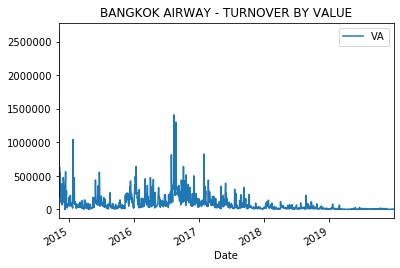

In [21]:
stock.plot(title='BANGKOK AIRWAY - TURNOVER BY VALUE')

In [22]:
# Compute moving average
stock.loc[:,("VA_sma100")] = SMA(stock['VA'], timeperiod=100)
stock

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,VA,VA_sma100
Date,,
2019-01-02,3653.9,NaN
2019-01-03,7205.9,NaN
2019-01-04,8110.4,NaN
2019-01-07,14482.2,NaN
2019-01-08,11579.2,NaN
...,...,...
2014-12-24,76809.1,181914.185
2014-12-25,64018.8,182081.048
2014-12-26,85903.9,182792.874


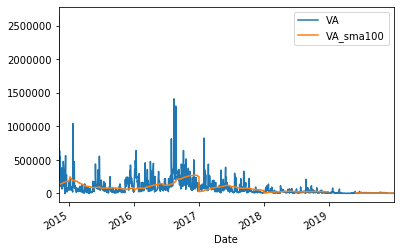

In [23]:
stock[['VA', 'VA_sma100']].plot()

# Time-Series of daily trading value of the Universe

In [24]:
lookup = pd.read_csv('lookup-stock.csv')
lookup

,Unnamed: 0,ISIN,RIC,name,symbol
0,0,TH0670A10Y03,TH:7UP,SEVEN UTILITIES AND POWER ORS,7UP
1,1,TH0770010Z08,TH:A,AREEYA PROPERTY,A
2,2,TH3437010004,TH:AAV,ASIA AVIATION,AAV
3,3,TH4745010009,TH:ABPIF,AMATA B GRIMM PWPL.IFCF.,ABPIF
4,4,TH0342010Y07,TH:ACC,ADVANCED CONNECTION CORPORATION,ACC
...,...,...,...,...,...
597,597,TH0788010005,TH:WORK,WORKPOINT ENTERTAINMENT,WORK
598,598,TH6073010Z01,TH:WP,WP ENERGY,WP
599,599,TH8220010004,TH:WPH,WATTANAPAT HOSPITAL TRANG,WPH
600,600,TH8962010006,TH:ZEN,ZEN CORPORATION,ZEN


In [35]:
# Example lookup symbol from name

lookup.loc[lookup['name']=='ZEN CORPORATION'].symbol.values[0]

'ZEN'

In [61]:
dataset = {}
crosssection = []

for k, v in series.items():
    # Make one series of whole study period
    stock = pd.concat(series[k], axis=0)
    stock.columns = ['Date', 'VA']
    stock = stock.set_index('Date') # Set date index
    stock.sort_index(inplace=True) # Sort. Need before computing moving average.
    # Remove NA
    stock = stock.loc[stock['VA']!='NA']
    # Compute moving average
    stock.loc[:,("VA_sma100")] = SMA(stock['VA'], timeperiod=100)
    
    # Find symbol from name
    normal_name = k.replace(" - TURNOVER BY VALUE","")
    symbol = lookup.loc[lookup['name']==normal_name].symbol.values[0]
    # stock.to_csv("VA/%s.csv" % symbol)
    # stock.plot()
    # print(symbol, stock['VA_sma100'])
    dataset[symbol] = stock
    try:
        k = symbol
        v = stock['2019-01-01':'2019-01-02']['VA_sma100'].values[0]
        crosssection.append({'symbol':k, 'VA100': v})
    except:
        print(symbol)

ACE
ACG
AI
AIMCG
AWC
BAM
BKER
BTNC
BUI
CHARAN
CPW
CSR
DOHOME
FE
FMT
GOLDPF
ICC
ILM
JUTHA
KDH
KWC
MATI
MIPF
MNIT2
MPIC
NC
NEW
NKI
OCC
OHTL
RBF
ROCK
S&J
SBPF
SEG
SFLEX
SFP
SHR
SIRIP
SPRIME
SUPEREIF
TCOAT
TIW
TLHPF
TNL
TNPF
TPP
TTI
TTLPF
TTT
TUPF
TYCN
UP
UPF
UT
VARO
VRANDA
WAVE
ZEN


In [62]:
dataset['ACC']['2019-01-01':'2019-01-02']['VA_sma100'].values[0]

319.37100000001186

# Cross-Section Daily Turnover Value

Look at particular date and rank market value.

In [64]:
df = pd.DataFrame(crosssection)
df

,symbol,VA100
0,7UP,4087.811
1,A,278.650
2,AAV,64606.738
3,ABPIF,2412.254
4,ACC,319.371
...,...,...
536,WIN,459.863
537,WORK,93269.507
538,WP,12500.481
539,WPH,1037.200


# Top 100-200 by Daily Turnover Value


In [66]:
df.sort_values('VA100',ascending=False)

,symbol,VA100
337,PTT,3131422.090
104,CPALL,2357170.754
338,PTTEP,1868653.935
26,AOT,1467982.034
339,PTTGC,1322027.728
...,...,...
299,OSP,NaN
323,PR9,NaN
391,SISB,NaN
449,TFFIF,NaN


In [68]:
top100 = df.sort_values('VA100',ascending=False)[:100]
top100

,symbol,VA100
337,PTT,3131422.090
104,CPALL,2357170.754
338,PTTEP,1868653.935
26,AOT,1467982.034
339,PTTGC,1322027.728
...,...,...
168,GLAND,55958.025
360,S,55471.815
25,ANAN,54614.321
263,MEGA,53641.471


In [70]:
top200 = df.sort_values('VA100',ascending=False)[:200]
top200

,symbol,VA100
337,PTT,3131422.090
104,CPALL,2357170.754
338,PTTEP,1868653.935
26,AOT,1467982.034
339,PTTGC,1322027.728
...,...,...
273,MK,7465.823
259,MC,7390.862
194,IMPACT,7384.557
522,VIBHA,7247.224


In [71]:
df

,symbol,VA100
0,7UP,4087.811
1,A,278.650
2,AAV,64606.738
3,ABPIF,2412.254
4,ACC,319.371
...,...,...
536,WIN,459.863
537,WORK,93269.507
538,WP,12500.481
539,WPH,1037.200


In [73]:
df.to_csv('all-va.csv')

# Market Cap

Find out market capitalization ranking at date 2019-01-01.

In [79]:
fname = 'SET_MV_2014-2020.xlsm'
wb = xlrd.open_workbook(fname)

In [80]:
wb.sheet_names()

['REQUEST_TABLE',
 'Data2020',
 'Data2019',
 'Data2018',
 'Data2017',
 'Data2016',
 'Data2015',
 'Data2014']

In [81]:
sheet = wb.sheets()[2]
sheet.row(3)

[text:'Name',
 text:'SEVEN UTILITIES AND POWER ORS - MARKET VALUE',
 text:'AREEYA PROPERTY - MARKET VALUE',
 text:'ASIA AVIATION - MARKET VALUE',
 text:'AMATA B GRIMM PWPL.IFCF. - MARKET VALUE',
 text:'ADVANCED CONNECTION CORPORATION - MARKET VALUE',
 text:'ABSOLUTE CLEAN ENERGY - MARKET VALUE',
 text:'AUTOCORP HOLDING - MARKET VALUE',
 text:'ADVANCED INFO SER. - MARKET VALUE',
 text:'AEC SECURITIES - MARKET VALUE',
 text:'AE.THANA SINSAP (THAI.) - MARKET VALUE',
 text:'ASIA FIBER - MARKET VALUE',
 text:'AAPICO HITECH - MARKET VALUE',
 text:'AIKCHOL HOSPITAL - MARKET VALUE',
 text:'ASIAN INSULATORS - MARKET VALUE',
 text:'AIM COML.GW.FH.&. LH. REIT UNT. - MARKET VALUE',
 text:'AIM INDL.GW.FH.&. LH. REIT - MARKET VALUE',
 text:'ADVANCED INFO.TECH. - MARKET VALUE',
 text:'AJ PLAST - MARKET VALUE',
 text:'AJ ADVANCE TECHNOLOGY ORS - MARKET VALUE',
 text:'EKARAT ENGINEERING - MARKET VALUE',
 text:'ALLA - MARKET VALUE',
 text:'ALT TELECOM - MARKET VALUE',
 text:'ALUCON - MARKET VALUE',
 tex

In [82]:
sheet.row(4)

[xldate:43466.0,
 number:1333.02,
 number:6517.0,
 number:20369.99,
 number:3690.0,
 number:684.96,
 text:'NA',
 text:'NA',
 number:512858.8,
 number:599.88,
 number:45499.96,
 number:414.73,
 number:6129.07,
 number:2653.39,
 number:4255.99,
 text:'NA',
 number:1581.0,
 number:4064.52,
 number:3255.43,
 number:1102.48,
 number:1061.2,
 number:816.0,
 number:2905.77,
 number:7538.39,
 number:1307.71,
 number:4751.82,
 number:22859.41,
 number:22859.41,
 number:4151.39,
 number:844.97,
 number:10798.9,
 number:917855.9,
 number:18875.35,
 number:2400.0,
 number:3154.8,
 number:799.96,
 number:1169.08,
 number:1706.5,
 number:1791.27,
 number:319.7,
 number:2236.08,
 number:2629.0,
 number:2048.0,
 number:3717.68,
 number:483.0,
 number:8163.98,
 number:6443.31,
 text:'NA',
 number:11756.21,
 number:3946.16,
 number:348.7,
 number:331.88,
 number:24360.0,
 number:20878.0,
 text:'NA',
 number:76396.38,
 number:4560.0,
 number:281357.8,
 number:387494.8,
 number:41645.56,
 number:43717.26,

In [83]:
r = sheet.row(4)
# Date
dt = datetime(*xlrd.xldate_as_tuple(r[0].value, wb.datemode))
dt

datetime.datetime(2019, 1, 1, 0, 0)

In [84]:
s1 = pd.Series(sheet.row(3)).apply(lambda x: x.value)
s2 = pd.Series(r).apply(lambda x: x.value)

df = pd.concat([s1,s2], axis=1)
df.columns = ['ticker', 'market-cap']
df

,ticker,market-cap
0,Name,43466
1,SEVEN UTILITIES AND POWER ORS - MARKET VALUE,1333.02
2,AREEYA PROPERTY - MARKET VALUE,6517
3,ASIA AVIATION - MARKET VALUE,20370
4,AMATA B GRIMM PWPL.IFCF. - MARKET VALUE,3690
...,...,...
598,WORKPOINT ENTERTAINMENT - MARKET VALUE,10288.3
599,WP ENERGY - MARKET VALUE,2582.13
600,WATTANAPAT HOSPITAL TRANG - MARKET VALUE,1392
601,ZEN CORPORATION - MARKET VALUE,NA


In [85]:
# Filter out missing data
df = df.loc[df['market-cap']!='NA']
df

,ticker,market-cap
0,Name,43466
1,SEVEN UTILITIES AND POWER ORS - MARKET VALUE,1333.02
2,AREEYA PROPERTY - MARKET VALUE,6517
3,ASIA AVIATION - MARKET VALUE,20370
4,AMATA B GRIMM PWPL.IFCF. - MARKET VALUE,3690
...,...,...
597,WYNCOAST INDUSTRIAL PARK - MARKET VALUE,303.02
598,WORKPOINT ENTERTAINMENT - MARKET VALUE,10288.3
599,WP ENERGY - MARKET VALUE,2582.13
600,WATTANAPAT HOSPITAL TRANG - MARKET VALUE,1392


In [86]:
# Filter out first row that is the column name.
df = df[1:]
df

,ticker,market-cap
1,SEVEN UTILITIES AND POWER ORS - MARKET VALUE,1333.02
2,AREEYA PROPERTY - MARKET VALUE,6517
3,ASIA AVIATION - MARKET VALUE,20370
4,AMATA B GRIMM PWPL.IFCF. - MARKET VALUE,3690
5,ADVANCED CONNECTION CORPORATION - MARKET VALUE,684.96
...,...,...
597,WYNCOAST INDUSTRIAL PARK - MARKET VALUE,303.02
598,WORKPOINT ENTERTAINMENT - MARKET VALUE,10288.3
599,WP ENERGY - MARKET VALUE,2582.13
600,WATTANAPAT HOSPITAL TRANG - MARKET VALUE,1392


In [88]:
# Only non-error
df = df.loc[df['ticker']!='#ERROR']
df

,ticker,market-cap
1,SEVEN UTILITIES AND POWER ORS - MARKET VALUE,1333.02
2,AREEYA PROPERTY - MARKET VALUE,6517
3,ASIA AVIATION - MARKET VALUE,20370
4,AMATA B GRIMM PWPL.IFCF. - MARKET VALUE,3690
5,ADVANCED CONNECTION CORPORATION - MARKET VALUE,684.96
...,...,...
597,WYNCOAST INDUSTRIAL PARK - MARKET VALUE,303.02
598,WORKPOINT ENTERTAINMENT - MARKET VALUE,10288.3
599,WP ENERGY - MARKET VALUE,2582.13
600,WATTANAPAT HOSPITAL TRANG - MARKET VALUE,1392


/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,ticker,market-cap,normal_name
1,SEVEN UTILITIES AND POWER ORS - MARKET VALUE,1333.02,SEVEN UTILITIES AND POWER ORS - MARKET VALUE
2,AREEYA PROPERTY - MARKET VALUE,6517.00,AREEYA PROPERTY - MARKET VALUE
3,ASIA AVIATION - MARKET VALUE,20369.99,ASIA AVIATION - MARKET VALUE
4,AMATA B GRIMM PWPL.IFCF. - MARKET VALUE,3690.00,AMATA B GRIMM PWPL.IFCF. - MARKET VALUE
5,ADVANCED CONNECTION CORPORATION - MARKET VALUE,684.96,ADVANCED CONNECTION CORPORATION - MARKET VALUE
...,...,...,...
597,WYNCOAST INDUSTRIAL PARK - MARKET VALUE,303.02,WYNCOAST INDUSTRIAL PARK - MARKET VALUE
598,WORKPOINT ENTERTAINMENT - MARKET VALUE,10288.34,WORKPOINT ENTERTAINMENT - MARKET VALUE
599,WP ENERGY - MARKET VALUE,2582.13,WP ENERGY - MARKET VALUE
600,WATTANAPAT HOSPITAL TRANG - MARKET VALUE,1392.00,WATTANAPAT HOSPITAL TRANG - MARKET VALUE


In [91]:
# Convert to numeric
df['market-cap'] = df['market-cap'].apply(lambda x: float(x))
df.describe()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,market-cap
count,5.820000e+02
mean,2.708701e+04
std,9.333302e+04
min,8.433000e+01
25%,1.463300e+03
50%,3.567505e+03
75%,1.340153e+04
max,1.313897e+06


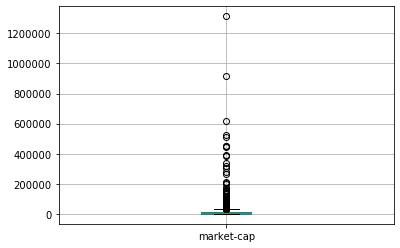

In [92]:
df.boxplot()

# Top 200-300 by market cap

In [93]:
df.sort_values('market-cap',ascending=False)

,ticker,market-cap
369,PTT - MARKET VALUE,1313897.00
31,AIRPORTS OF THAILAND - MARKET VALUE,917855.90
115,CP ALL - MARKET VALUE,617588.00
409,SIAM CEMENT - MARKET VALUE,523200.40
8,ADVANCED INFO SER. - MARKET VALUE,512858.80
...,...,...
87,BOUTIQUE NEW CITY - MARKET VALUE,229.20
309,NEW CITY (BANGKOK) - MARKET VALUE,216.79
301,MFC-NICHADA THANI PROPERTY - MARKET VALUE,205.62
558,T U DOME RESD.CMX. LH. PR. - MARKET VALUE,176.15


In [94]:
top200 = df.sort_values('market-cap',ascending=False)[:200]
top200

,ticker,market-cap
369,PTT - MARKET VALUE,1313897.00
31,AIRPORTS OF THAILAND - MARKET VALUE,917855.90
115,CP ALL - MARKET VALUE,617588.00
409,SIAM CEMENT - MARKET VALUE,523200.40
8,ADVANCED INFO SER. - MARKET VALUE,512858.80
...,...,...
261,LH SHOPPING CENTERS LEASEHOLD REIT - MARKET VALUE,7906.64
439,SYN MUN KONG - MARKET VALUE,7900.00
583,VANACHAI GROUP - MARKET VALUE,7741.01
217,POSCO-THAINOX - MARKET VALUE,7717.75


In [95]:
top300 = df.sort_values('market-cap',ascending=False)[:300]
top300

,ticker,market-cap
369,PTT - MARKET VALUE,1313897.00
31,AIRPORTS OF THAILAND - MARKET VALUE,917855.90
115,CP ALL - MARKET VALUE,617588.00
409,SIAM CEMENT - MARKET VALUE,523200.40
8,ADVANCED INFO SER. - MARKET VALUE,512858.80
...,...,...
85,BURIRAM SUG.GP. PWPL. INFR. - MARKET VALUE,3465.00
546,THAI STEEL CABLE - MARKET VALUE,3455.34
74,BANGKOK DEC-CON - MARKET VALUE,3443.87
431,SIS DS.(THAILAND) - MARKET VALUE,3431.94


In [109]:
df["normal_name"] = df['ticker'].apply(lambda x: x.replace(" - MARKET VALUE", ""))
df["symbol"] = df['normal_name'].apply(lambda x: lookup.loc[lookup['name']==x].symbol.values[0])
df

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ticker,market-cap,normal_name,common_name,symbol
1,SEVEN UTILITIES AND POWER ORS - MARKET VALUE,1333.02,SEVEN UTILITIES AND POWER ORS,SEVEN UTILITIES AND POWER ORS,7UP
2,AREEYA PROPERTY - MARKET VALUE,6517.00,AREEYA PROPERTY,AREEYA PROPERTY,A
3,ASIA AVIATION - MARKET VALUE,20369.99,ASIA AVIATION,ASIA AVIATION,AAV
4,AMATA B GRIMM PWPL.IFCF. - MARKET VALUE,3690.00,AMATA B GRIMM PWPL.IFCF.,AMATA B GRIMM PWPL.IFCF.,ABPIF
5,ADVANCED CONNECTION CORPORATION - MARKET VALUE,684.96,ADVANCED CONNECTION CORPORATION,ADVANCED CONNECTION CORPORATION,ACC
...,...,...,...,...,...
597,WYNCOAST INDUSTRIAL PARK - MARKET VALUE,303.02,WYNCOAST INDUSTRIAL PARK,WYNCOAST INDUSTRIAL PARK,WIN
598,WORKPOINT ENTERTAINMENT - MARKET VALUE,10288.34,WORKPOINT ENTERTAINMENT,WORKPOINT ENTERTAINMENT,WORK
599,WP ENERGY - MARKET VALUE,2582.13,WP ENERGY,WP ENERGY,WP
600,WATTANAPAT HOSPITAL TRANG - MARKET VALUE,1392.00,WATTANAPAT HOSPITAL TRANG,WATTANAPAT HOSPITAL TRANG,WPH


In [111]:
df = df[['market-cap','symbol', 'normal_name']]
df

,market-cap,symbol,normal_name
1,1333.02,7UP,SEVEN UTILITIES AND POWER ORS
2,6517.00,A,AREEYA PROPERTY
3,20369.99,AAV,ASIA AVIATION
4,3690.00,ABPIF,AMATA B GRIMM PWPL.IFCF.
5,684.96,ACC,ADVANCED CONNECTION CORPORATION
...,...,...,...
597,303.02,WIN,WYNCOAST INDUSTRIAL PARK
598,10288.34,WORK,WORKPOINT ENTERTAINMENT
599,2582.13,WP,WP ENERGY
600,1392.00,WPH,WATTANAPAT HOSPITAL TRANG


In [112]:
df.to_csv('all-mv.csv')

# Trading System's Universe

1. On 2019-01-01  
2. Rank by market cap. Pick top 300 stocks  
3. Rank by daily turn over. Pick top 100-200 stocks  

In [113]:
df1 = pd.read_csv('all-va.csv')
df1

,Unnamed: 0,symbol,VA100
0,0,7UP,4087.811
1,1,A,278.650
2,2,AAV,64606.738
3,3,ABPIF,2412.254
4,4,ACC,319.371
...,...,...,...
536,536,WIN,459.863
537,537,WORK,93269.507
538,538,WP,12500.481
539,539,WPH,1037.200


In [114]:
df2 = pd.read_csv('all-mv.csv')
df2

,Unnamed: 0,market-cap,symbol,normal_name
0,1,1333.02,7UP,SEVEN UTILITIES AND POWER ORS
1,2,6517.00,A,AREEYA PROPERTY
2,3,20369.99,AAV,ASIA AVIATION
3,4,3690.00,ABPIF,AMATA B GRIMM PWPL.IFCF.
4,5,684.96,ACC,ADVANCED CONNECTION CORPORATION
...,...,...,...,...
577,597,303.02,WIN,WYNCOAST INDUSTRIAL PARK
578,598,10288.34,WORK,WORKPOINT ENTERTAINMENT
579,599,2582.13,WP,WP ENERGY
580,600,1392.00,WPH,WATTANAPAT HOSPITAL TRANG


In [117]:
# Top 300 market cap.

df2.sort_values('market-cap',ascending=False)[:300]

,Unnamed: 0,market-cap,symbol,normal_name
358,369,1313897.00,PTT,PTT
27,31,917855.90,AOT,AIRPORTS OF THAILAND
108,115,617588.00,CPALL,CP ALL
397,409,523200.40,SCC,SIAM CEMENT
5,8,512858.80,ADVANC,ADVANCED INFO SER.
...,...,...,...,...
78,85,3465.00,BRRGIF,BURIRAM SUG.GP. PWPL. INFR.
528,546,3455.34,TSC,THAI STEEL CABLE
68,74,3443.87,BKD,BANGKOK DEC-CON
416,431,3431.94,SIS,SIS DS.(THAILAND)


In [118]:
# Top 200 VA100

df1.sort_values('VA100',ascending=False)[:200]

,Unnamed: 0,symbol,VA100
337,337,PTT,3131422.090
104,104,CPALL,2357170.754
338,338,PTTEP,1868653.935
26,26,AOT,1467982.034
339,339,PTTGC,1322027.728
...,...,...,...
273,273,MK,7465.823
259,259,MC,7390.862
194,194,IMPACT,7384.557
522,522,VIBHA,7247.224


In [121]:
# Join - inner join of two data frame on the symbol
df3 = df2.merge(df1, how='inner', on=['symbol'])
df3

,Unnamed: 0_x,market-cap,symbol,normal_name,Unnamed: 0_y,VA100
0,1,1333.02,7UP,SEVEN UTILITIES AND POWER ORS,0,4087.811
1,2,6517.00,A,AREEYA PROPERTY,1,278.650
2,3,20369.99,AAV,ASIA AVIATION,2,64606.738
3,4,3690.00,ABPIF,AMATA B GRIMM PWPL.IFCF.,3,2412.254
4,5,684.96,ACC,ADVANCED CONNECTION CORPORATION,4,319.371
...,...,...,...,...,...,...
536,597,303.02,WIN,WYNCOAST INDUSTRIAL PARK,536,459.863
537,598,10288.34,WORK,WORKPOINT ENTERTAINMENT,537,93269.507
538,599,2582.13,WP,WP ENERGY,538,12500.481
539,600,1392.00,WPH,WATTANAPAT HOSPITAL TRANG,539,1037.200


In [123]:
# Top300 by market cap

top300mkt = df3.sort_values('market-cap',ascending=False)[:300]
top300mkt 

,Unnamed: 0_x,market-cap,symbol,normal_name,Unnamed: 0_y,VA100
337,369,1313897.00,PTT,PTT,337,3131422.090
26,31,917855.90,AOT,AIRPORTS OF THAILAND,26,1467982.034
104,115,617588.00,CPALL,CP ALL,104,2357170.754
373,409,523200.40,SCC,SIAM CEMENT,373,900054.695
5,8,512858.80,ADVANC,ADVANCED INFO SER.,5,999060.386
...,...,...,...,...,...,...
261,285,3325.00,MCS,MCS STEEL,261,11026.407
13,18,3255.43,AJ,AJ PLAST,13,1104.171
139,154,3240.00,EKH,EKACHAI MEDICAL CARE,139,6891.574
208,228,3199.08,JCK,JCK INTERNATIONAL ORS,208,3340.974


In [124]:
# Top200 by VA100

top200mktVA = df3.sort_values('VA100',ascending=False)[:200]
top200mktVA 

,Unnamed: 0_x,market-cap,symbol,normal_name,Unnamed: 0_y,VA100
337,369,1313897.00,PTT,PTT,337,3131422.090
104,115,617588.00,CPALL,CP ALL,104,2357170.754
338,370,450593.10,PTTEP,PTT EXPLORATION & PRDN.,338,1868653.935
26,31,917855.90,AOT,AIRPORTS OF THAILAND,26,1467982.034
339,371,321255.40,PTTGC,PTT GLOBAL CHEMICAL,339,1322027.728
...,...,...,...,...,...,...
273,298,3690.28,MK,MK REAL ESTATE DEV.,273,7465.823
259,283,8720.00,MC,MC GROUP,259,7390.862
194,214,28167.50,IMPACT,IPCT.GW.REIT.TST. UTS.,194,7384.557
522,581,26398.73,VIBHA,VIBHAVADI MEDICAL,522,7247.224


# Save Results to CSV

In [127]:
# Save sort results

# 1. top 300 by market cap

top300mkt[['symbol','market-cap', 'VA100']].to_csv('1_top300_byMarketCap.csv')

In [129]:

# 2. all stocks by daily turn over value and market cap

df3[['symbol','market-cap', 'VA100']].to_csv('2_rankAll_byVA100.csv')

In [132]:
# 3.
top200mktVA[['symbol','market-cap', 'VA100']].to_csv('3_universe_200Stocks.csv')